The population mean Score is: 91.40706693478886
    index            Restaurant Name Zip Code Inspection Date  Score  \
95   6396        Courtney's Catering    78729         9/24/15    100   
96   3695                 Blazer Tag    78745          1/5/16     99   
97   7683               Epoch Coffee    78757         4/19/16     90   
98  11927               KFC X743716     78745         4/10/15     85   
99   2384  Appletree Learning Center    78745         7/22/14     95   

                                              Address  Facility ID  \
95  13233 POND SPRINGS RD\nAUSTIN, TX 78729\n(30.4...     10062095   
96  1701 W BEN WHITE BLVD EB\nAUSTIN, TX 78745\n(3...      2801669   
97  2700 W ANDERSON LN\nAUSTIN, TX 78757\n(30.3581...     11028095   
98  801 E WILLIAM CANNON DR\nAUSTIN, TX 78745\n(30...      2800632   
99  4630 WEST GATE BLVD\nAUSTIN, TX 78745\n(30.229...      2801957   

   Process Description  
95  Routine Inspection  
96  Routine Inspection  
97  Routine Inspection 

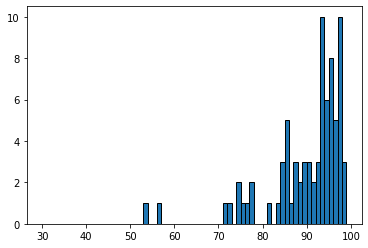

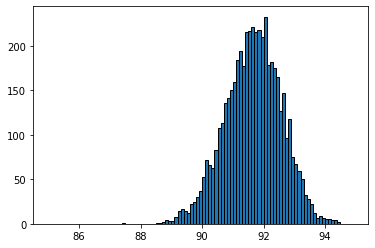

95 percent Confidence interval for restaurant score: [89.79,93.33]
95 percent Confidence interval computed by normal approx: [89.8477847525948,93.4522152474052]


In [42]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

pop = pd.read_csv("restaurant_inspection_scores.csv")

#print(pop.tail())

#Q1: Plot a histogram of the scores.

#plt.hist(pop.Score, bins=np.arange(35,100,5), edgecolor='black')
#plt.show()

print("The population mean Score is: "+str(pop.Score.mean()))

sample_scores = pop.sample(100).reset_index()

print(sample_scores.tail())

plt.hist(sample_scores.Score, bins=np.arange(30,100), edgecolor='black')
plt.show()

#Q3: Bootstrap 5000 resamples from restaurant_sample and compute the mean 
#restaurant score in each resample. It should return an array of those 5000 resample means.

bsm=np.array([sample_scores.sample(100,replace=True).Score.mean() for i in range(5000)])

plt.hist(bsm, bins=np.arange(85,95,0.1), edgecolor='black')
plt.show()

#Q4: Compute a 95% confidence interval for the restaurant score.

print("95 percent Confidence interval for restaurant score: ["+str(round(np.percentile(bsm, 2.5),2))+","+str(round(np.percentile(bsm, 97.5),2))+"]")

#Q7: Without referencing the array resampled_means or performing any new simulations, 
#calculate an interval around the sample_mean that covers approximately 95% of the numbers 
#in the resampled_means array.

#Solution: Since 

sample_mean=sample_scores.Score.mean()
sample_std=sample_scores.Score.std()

lower_bound=sample_mean-2*(sample_std/10)
upper_bound=sample_mean+2*(sample_std/10)

print("95 percent Confidence interval computed by normal approx: ["+str(lower_bound)+","+str(upper_bound)+"]")

